In [1]:
%%time
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as prf

Wall time: 7.97 s


In [2]:
netflix = pd.read_csv(r"C:\Users\LENOVO\Desktop\Netflix EDa\netflix_titles_nov_2019.csv")
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


### About Data
## This dataset contains data collected from Netflix of different TV shows and movies.
* type: Gives information about 2 different unique values one is TV Show and another is Movie
* title: Gives information about the title of Movie or TV Showirector: Gives information about the director who directed the Movie or TV Show
* cast: Gives information about the cast who plays role in Movie or TV Show
* release_year: Gives information about the year when Movie or TV Show was released
* rating: Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc)
* duration: Gives information about the duration of Movie or TV Show
* listed_in: Gives information about the genre of Movie or TV Show
* description: Gives information about the description of Movie or TV Show

In [3]:
m=netflix.isnull().sum()
miss= (netflix.isnull().sum()/len(netflix))*100
miss_data=pd.concat([m,miss],axis=1,keys=['Total','%'])
print(miss_data)

              Total          %
show_id           0   0.000000
title             0   0.000000
director       1901  32.568100
cast            556   9.525441
country         427   7.315402
date_added      642  10.998801
release_year      0   0.000000
rating           10   0.171321
duration          0   0.000000
listed_in         0   0.000000
description       0   0.000000
type              0   0.000000


In [4]:
netflix.groupby('type')['title'].count().sort_values(ascending = False)

type
Movie      3939
TV Show    1898
Name: title, dtype: int64

In [6]:
netflix.type.value_counts().to_frame('values_count') 

,values_count
Movie,3939
TV Show,1898


In [7]:
netflix.corr()

,show_id,release_year
show_id,1.000000,0.536742
release_year,0.536742,1.000000


<AxesSubplot:>

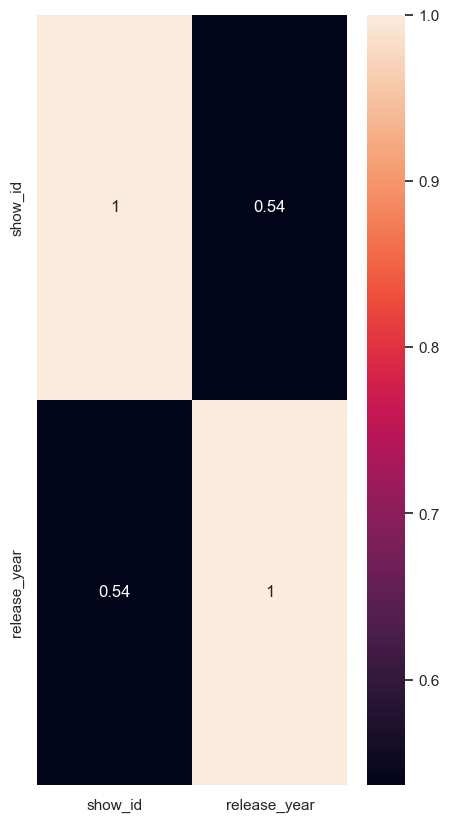

In [8]:
sns.set()
plt.subplots(figsize=(5,10))
sns.heatmap(netflix.corr(),annot=True)

In [9]:
netflix_profile = prf.ProfileReport(netflix)
netflix_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
netflix_profile.to_file(output_file="Movies_before_preprocessing.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
netflix.groupby(["type","release_year"])["title"].agg(pd.Series.mode)

type     release_year
Movie    1942                       [Prelude to War, The Battle of Midway]
         1943            [Undercover: How to Operate Behind Enemy Lines...
         1944            [The Memphis Belle: A Story of a\nFlying Fortr...
         1945            [Know Your Enemy - Japan, Nazi Concentration C...
         1946                           [Let There Be Light, The Stranger]
                                               ...                        
TV Show  2016            [28 Moons, 46, 72 Cutest Animals, 72 Dangerous...
         2017            [100% Hotter, 21 Thunder, 72 Dangerous Animals...
         2018            [1983, 21 Sarfarosh: Saragarhi 1897, 7 Days Ou...
         2019                                                    Kakegurui
         2020                                           Maradona in Mexico
Name: title, Length: 113, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'TV-14'),
  Text(1, 0, 'TV-G'),
  Text(2, 0, 'TV-Y'),
  Text(3, 0, 'TV-MA'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'R'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'G'),
  Text(9, 0, 'PG-13'),
  Text(10, 0, 'TV-Y7-FV'),
  Text(11, 0, 'NR'),
  Text(12, 0, 'UR'),
  Text(13, 0, 'NC-17')])

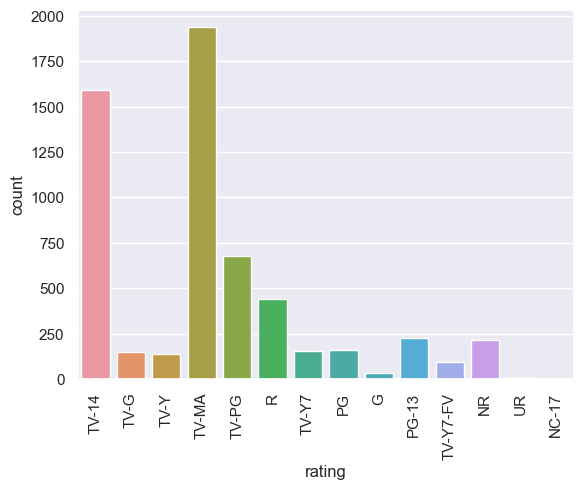

In [12]:
sns.countplot(x=netflix['rating'],orient = 'v')
plt.xticks(rotation = 90)


In [13]:
netflix.groupby("type")["rating"].agg(pd.Series.mode)

type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object

In [14]:
netflix.groupby("type")["rating"].agg(pd.Series.mode)

type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object

In [15]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [17]:
new_genre = netflix['listed_in'].str.split(",",2)

In [18]:
new_genre

0       [International TV Shows,  Korean TV Shows,  Ro...
1                  [Documentaries,  International Movies]
2              [Comedies,  Dramas,  International Movies]
3       [Dramas,  Independent Movies,  International M...
4                                              [Kids' TV]
                              ...                        
5832                        [Cult Movies,  Horror Movies]
5833                                      [Horror Movies]
5834                      [Dramas,  International Movies]
5835                       [Stand-Up Comedy & Talk Shows]
5836            [Dramas,  Independent Movies,  Thrillers]
Name: listed_in, Length: 5837, dtype: object

In [19]:
netflix['Genre 1'] = new_genre.str.get(0)
netflix['Genre 2'] = new_genre.str.get(1)
netflix['Genre 3'] = new_genre.str.get(2)

In [20]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Genre 1,Genre 2,Genre 3
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids' TV,NaN,NaN


In [21]:
netflix['Genre 1'].describe(include='all')

count       5837
unique        35
top       Dramas
freq         995
Name: Genre 1, dtype: object

In [22]:
netflix['Genre 2'].describe(include='all')

count                      4457
unique                       37
top        International Movies
freq                       1136
Name: Genre 2, dtype: object

In [23]:
netflix['Genre 3'].describe(include='all')

count                      2469
unique                       31
top        International Movies
freq                        584
Name: Genre 3, dtype: object

In [24]:
netflix.drop('listed_in',axis = 1,inplace = True)

In [25]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,type,Genre 1,Genre 2,Genre 3
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,Brought together by meaningful meals in the pa...,TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids' TV,NaN,NaN


In [26]:
netflix.drop_duplicates(subset = None,keep='first',inplace=False)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,type,Genre 1,Genre 2,Genre 3
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,Brought together by meaningful meals in the pa...,TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids' TV,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"This collection cherry-picks trailers, forgott...",Movie,Cult Movies,Horror Movies,NaN
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,"After committing suicide, a washed-up rocker r...",Movie,Horror Movies,NaN,NaN
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,When he causes a car accident that leaves a yo...,Movie,Dramas,International Movies,NaN
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,"In each episode, four celebrities join host Jo...",TV Show,Stand-Up Comedy & Talk Shows,NaN,NaN


## Movies which are made on year basis

In [27]:
netflix.groupby(['Genre 1'])['release_year'].count().sort_values(ascending = False)

Genre 1
Dramas                          995
Comedies                        730
Documentaries                   634
International TV Shows          546
Action & Adventure              532
Children & Family Movies        322
Crime TV Shows                  302
Kids' TV                        275
Stand-Up Comedy                 265
British TV Shows                205
Horror Movies                   185
Docuseries                      144
Anime Series                    111
TV Comedies                      86
International Movies             77
Reality TV                       61
Movies                           55
TV Dramas                        54
Classic Movies                   48
Thrillers                        37
Stand-Up Comedy & Talk Shows     28
TV Action & Adventure            28
Romantic TV Shows                19
Classic & Cult TV                19
Independent Movies               16
Music & Musicals                 12
Sci-Fi & Fantasy                 10
Anime Features      

In [28]:
netflix.groupby(['Genre 2'])['release_year'].count().sort_values(ascending = False)

Genre 2
 International Movies            1136
 Dramas                           460
 Independent Movies               390
 International TV Shows           348
 Comedies                         257
 TV Dramas                        225
 TV Comedies                      208
 Romantic TV Shows                174
 Thrillers                        139
 Docuseries                       111
 Korean TV Shows                  104
 Music & Musicals                  92
 Romantic Movies                   86
 Sci-Fi & Fantasy                  74
 Sports Movies                     70
 TV Action & Adventure             62
 Reality TV                        55
 Crime TV Shows                    53
 Spanish-Language TV Shows         42
 Faith & Spirituality              40
 Horror Movies                     40
 Kids' TV                          38
 Anime Features                    31
 Cult Movies                       28
 Science & Nature TV               23
 Documentaries                     23
 LGB

In [29]:
netflix.groupby(['Genre 3'])['release_year'].count().sort_values(ascending = False)

Genre 3
 International Movies            584
 TV Dramas                       295
 Romantic Movies                 250
 Thrillers                       177
 TV Comedies                     131
 Music & Musicals                125
 Independent Movies              110
 Sci-Fi & Fantasy                 81
 Sports Movies                    78
 International TV Shows           72
 Romantic TV Shows                72
 Spanish-Language TV Shows        71
 TV Sci-Fi & Fantasy              48
 TV Mysteries                     48
 Science & Nature TV              43
 LGBTQ Movies                     37
 TV Thrillers                     33
 Dramas                           33
 TV Action & Adventure            32
 Teen TV Shows                    31
 Reality TV                       30
 TV Horror                        24
 Docuseries                       16
 Korean TV Shows                  16
 Stand-Up Comedy & Talk Shows      6
 Cult Movies                       6
 Faith & Spirituality         

In [30]:
netflix.groupby(['release_year'])['release_year'].count().sort_values(ascending=False)

release_year
2018    1040
2017     928
2016     818
2019     762
2015     502
        ... 
1956       1
1955       1
1954       1
1947       1
2020       1
Name: release_year, Length: 71, dtype: int64

## Observation:

From the above we can see that with passing years more movies are being made year by year

The above data shows that there is a sudden increase in the creation of movies in year 2016 as compared to year 2015

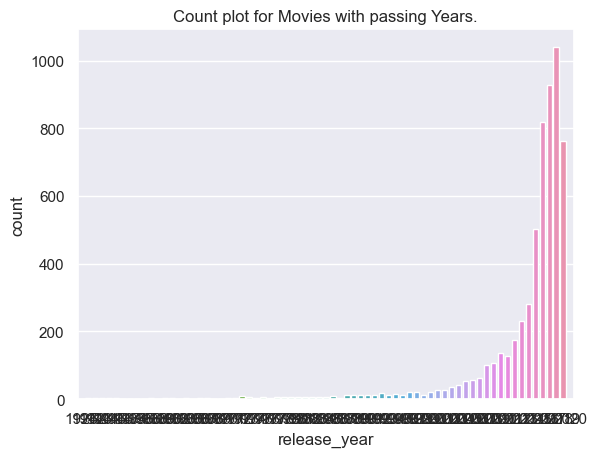

In [31]:
sns.countplot(x='release_year', data=netflix).set_title('Count plot for Movies with passing Years.')
sns.set(rc={'figure.figsize':(60,20)})
plt.show()

In [32]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,type,Genre 1,Genre 2,Genre 3
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,Brought together by meaningful meals in the pa...,TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids' TV,NaN,NaN


In [33]:
netflix['duration'].unique()

array(['1 Season', '67 min', '135 min', '106 min', '2 Seasons', '107 min',
       '81 min', '118 min', '110 min', '104 min', '93 min', '94 min',
       '124 min', '137 min', '134 min', '69 min', '209 min', '86 min',
       '24 min', '46 min', '117 min', '87 min', '92 min', '114 min',
       '121 min', '109 min', '96 min', '97 min', '56 min', '119 min',
       '3 Seasons', '8 Seasons', '138 min', '111 min', '88 min', '73 min',
       '116 min', '85 min', '102 min', '101 min', '28 min', '103 min',
       '131 min', '166 min', '105 min', '82 min', '84 min', '112 min',
       '89 min', '136 min', '129 min', '158 min', '78 min', '100 min',
       '74 min', '60 min', '143 min', '98 min', '54 min', '59 min',
       '95 min', '5 Seasons', '61 min', '4 Seasons', '123 min', '44 min',
       '68 min', '99 min', '91 min', '40 min', '90 min', '108 min',
       '200 min', '133 min', '115 min', '55 min', '153 min', '185 min',
       '127 min', '120 min', '139 min', '122 min', '36 min', '141 min',
   

In [34]:
netflix_seasons_data = netflix[netflix['duration'].astype(str).str.contains('Season')]

In [35]:
netflix_seasons_data

,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,type,Genre 1,Genre 2,Genre 3
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,Brought together by meaningful meals in the pa...,TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids' TV,NaN,NaN
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,This compelling show tells the story of the le...,TV Show,Crime TV Shows,International TV Shows,Spanish-Language TV Shows
11,81094391,Sugar Rush Christmas,NaN,"Hunter March, Candace Nelson, Adriano Zumbo",United States,"November 29, 2019",2019,TV-PG,1 Season,"It's everything you love about ""Sugar Rush"" – ...",TV Show,Reality TV,NaN,NaN
13,81152641,The Charming Stepmom,NaN,"Shahkrit Yamnarm, View Wannarot Sontichai, Kri...",NaN,"November 29, 2019",2019,TV-14,1 Season,A quirky fashion student becomes the nanny of ...,TV Show,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,70259177,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland","March 31, 2013",2016,TV-MA,1 Season,Ken Bruen's bestselling crime novels leap to l...,TV Show,Crime TV Shows,International TV Shows,TV Dramas
5814,70258566,DreamWorks Spooky Stories: Volume 2,NaN,"Seth Rogen, Kiefer Sutherland, Will Arnett, Hu...",NaN,"October 24, 2012",2011,TV-PG,1 Season,"The Shrek characters parody the music video ""T...",TV Show,Kids' TV,TV Comedies,NaN
5815,70242630,DreamWorks Shrek's Swamp Stories,NaN,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States,"August 17, 2012",2008,TV-PG,1 Season,"Shrek celebrates Halloween, Puss in Boots is c...",TV Show,Kids' TV,TV Action & Adventure,TV Comedies
5816,70242629,DreamWorks How to Train Your Dragon Legends,NaN,"Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States,"July 20, 2012",2011,TV-PG,1 Season,"In this set of shorts, Hiccup and the gang lea...",TV Show,Kids' TV,TV Action & Adventure,TV Sci-Fi & Fantasy


In [36]:
netflix['duration'].head()

0     1 Season
1       67 min
2      135 min
3      106 min
4    2 Seasons
Name: duration, dtype: object

<AxesSubplot:xlabel='release_year', ylabel='rating'>

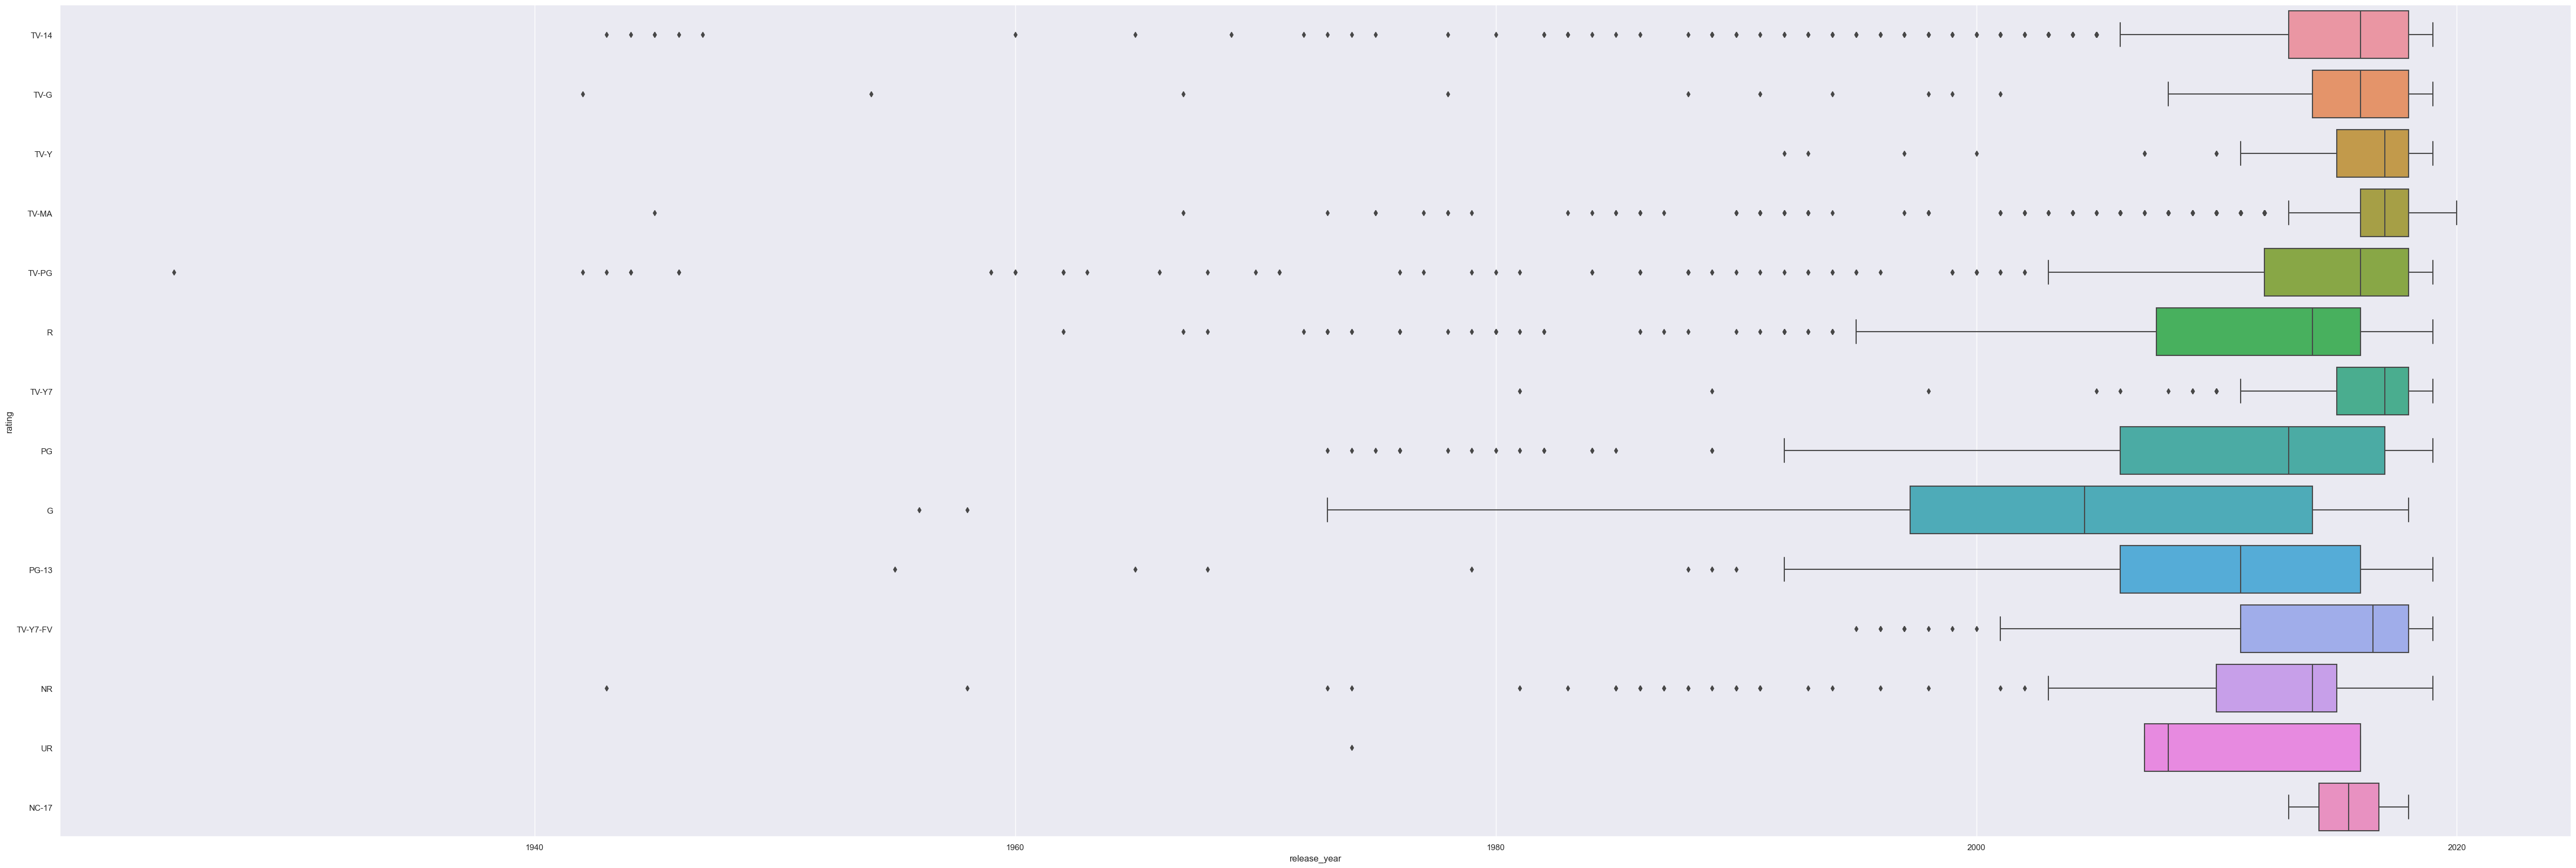

In [38]:
sns.boxplot(x="release_year", y="rating", data=netflix)

Text(0.5, 1.0, 'Country Wise Content On Netflix')

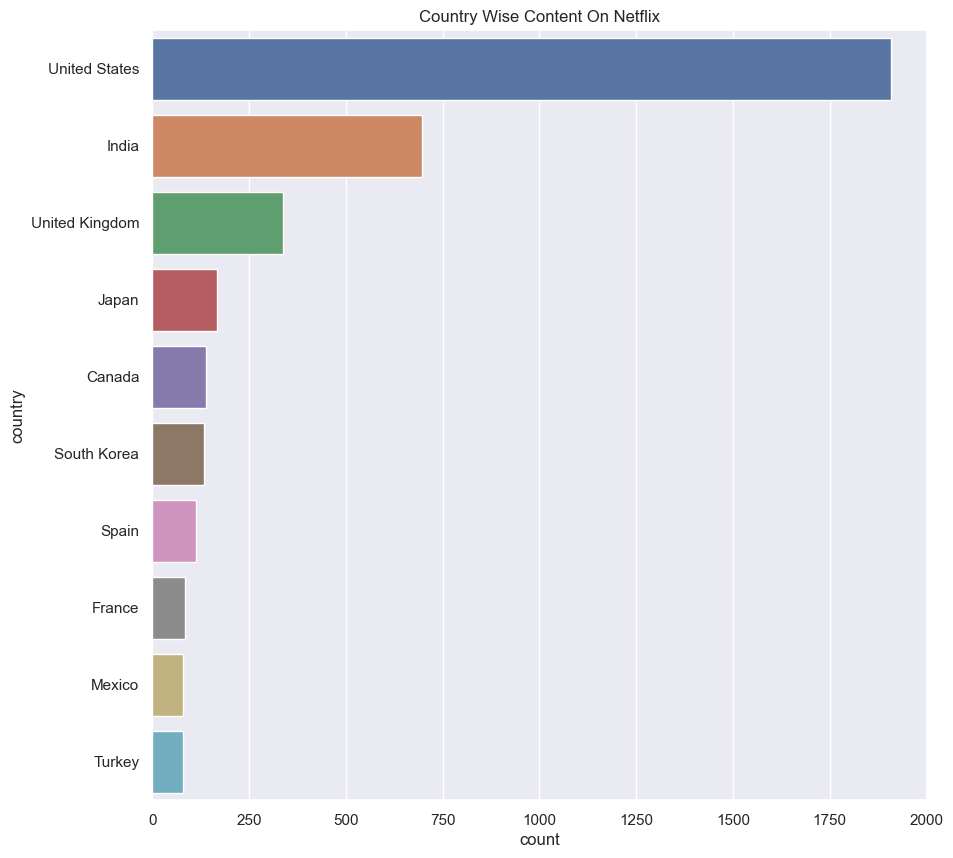

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(y='country',order = netflix['country'].value_counts().index[0:10],data=netflix)
plt.title('Country Wise Content On Netflix')

In [42]:
# show checking type of content based on country
movie_countries = netflix[netflix['type']=='Movie']
tv_show_countries = netflix[netflix['type']=='TV Show']

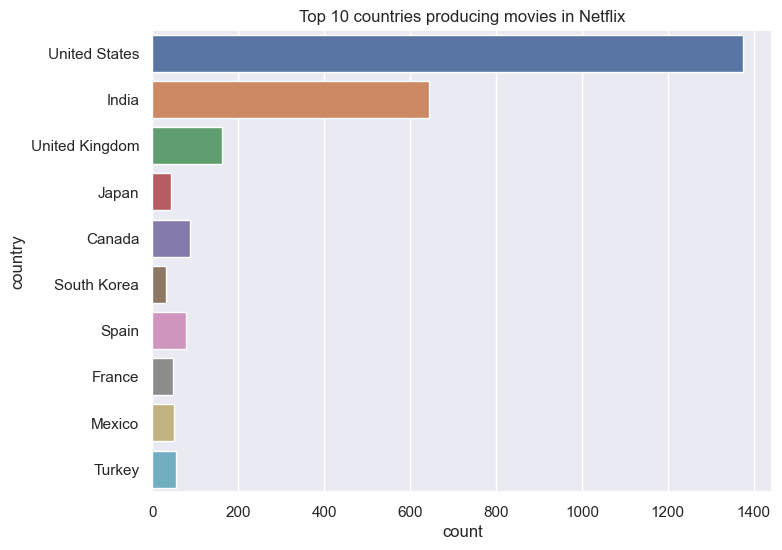

In [43]:
plt.figure(figsize =(8,6))
sns.countplot(y='country',order = netflix['country'].value_counts().index[0:10],data=movie_countries)
plt.title('Top 10 countries producing movies in Netflix')
plt.show()

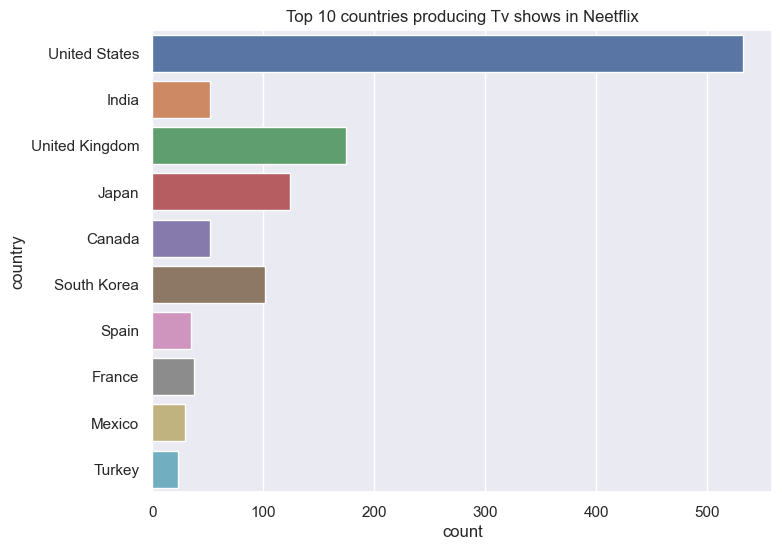

In [44]:
plt.figure(figsize =(8,6))
sns.countplot(y='country',order = netflix['country'].value_counts().index[0:10],data=tv_show_countries)
plt.title('Top 10 countries producing Tv shows in Neetflix')
plt.show()

In [45]:
netflix.rating.value_counts()

TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

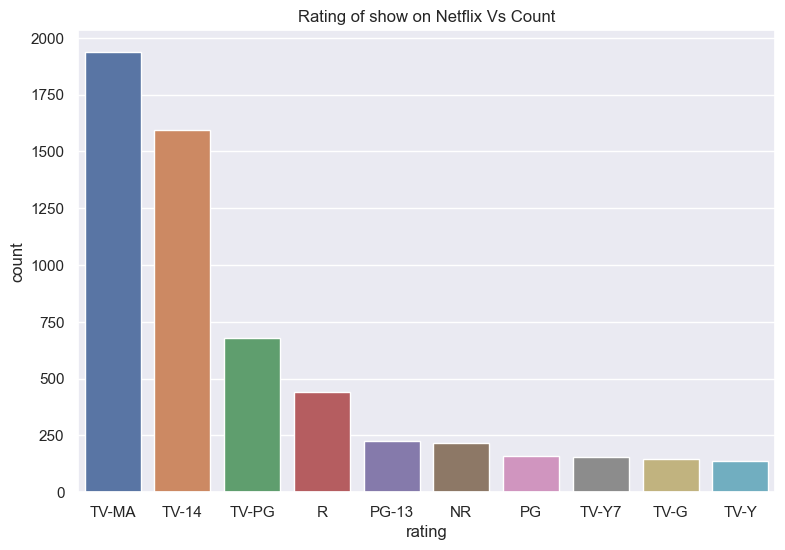

In [46]:
plt.figure(figsize = (9,6))
sns.countplot(x='rating', order = netflix['rating'].value_counts().index[0:10],data=netflix)
plt.title('Rating of show on Netflix Vs Count')
plt.show()

In [47]:
# Top 20
netflix.release_year.value_counts()[:20]

2018    1040
2017     928
2016     818
2019     762
2015     502
2014     281
2013     232
2012     174
2010     137
2011     127
2009     106
2008     102
2007      61
2006      57
2005      52
2004      41
2003      37
2001      28
2002      26
1998      22
Name: release_year, dtype: int64

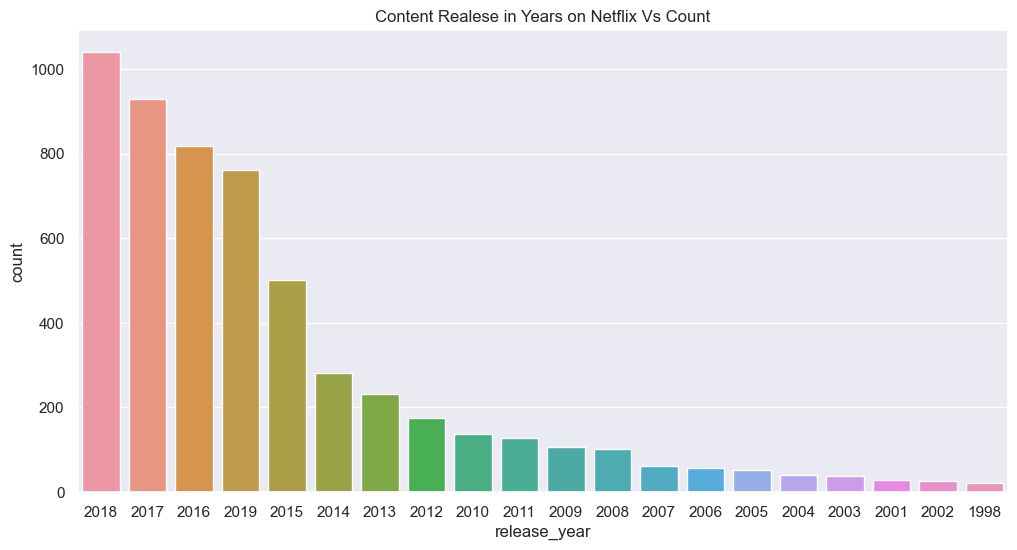

In [48]:
plt.figure(figsize = (12,6))
sns.countplot(x='release_year', order = netflix['release_year'].value_counts().index[0:20],data=netflix)
plt.title('Content Realese in Years on Netflix Vs Count')
plt.show()

In [53]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,type,Genre 1,Genre 2,Genre 3
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,Brought together by meaningful meals in the pa...,TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids' TV,NaN,NaN


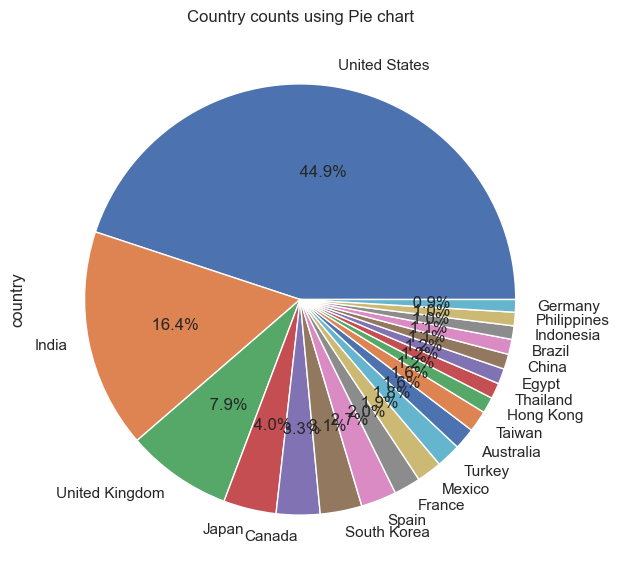

In [54]:
plt.figure(figsize =(10,7))
netflix["country"].value_counts()[:20].plot.pie(autopct="% 1.1f%%")
plt.title("Country counts using Pie chart")
plt.show()

### Summary

Netflix has more Movies than TV shows

Most number of Movies and tv shows are produces by united states & second one is india.

Most of the content on Netflix is for Mature Audiences

2018 is the year in which Netflix released alot more content as compared to other years.